## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your personal logistic regression implementation, as well as that of sci-kit learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using sci-kit learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [5]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [6]:
#Your code here
X = df[df.columns[:-1]]
y = df.target
print(y.value_counts())
X.head()


1.0    165
0.0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

Our manual regression weights: [ 0.7802778  -1.601665    2.61772008 -1.95194946 -1.39350985  0.05818755
  1.15984037  4.36925075 -0.83136019 -2.75080939  1.45778904 -3.10796257
 -2.19158082]


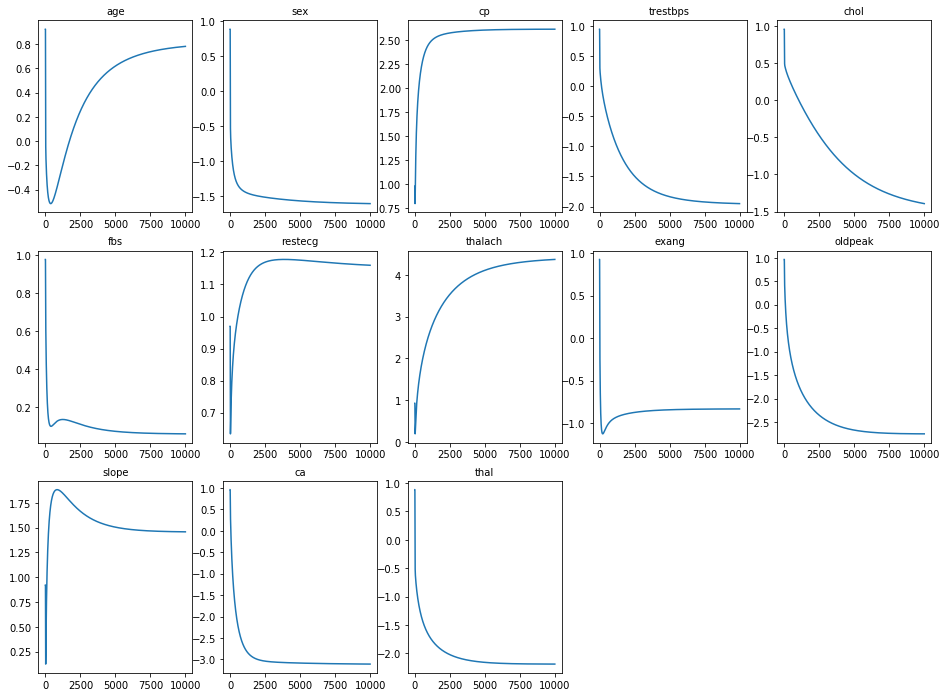

In [11]:
# Your code here
import numpy as np
def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

"""import matplotlib.pyplot as plt
#Your code here
z=np.linspace(-20,20,10000)
sig_z =[sigmoid(zi) for zi in z  ]

plt.plot(z, sig_z)
"""
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    #Return finalized Weights
    return weights, weights_col


weights, weight_col = grad_desc(X, y, 10000, 0.001)
weight_col.columns = np.arange(len(weight_col.columns))

plt.figure(figsize=(16, 12))

for (i, j) in enumerate(weights):
    plt.subplot(3, 5, i + 1)
    plt.title(list(X)[i], size='medium')
    plt.plot(weight_col.iloc[i].T)
    plt.axis('tight')
    
print("Our manual regression weights:", weights)   


## Now use your algorithm to make [probability] predictions on the test set

In [15]:
#Your code here
y_hat_test = sigmoid(np.dot(X_test, weights))
print([round(yi, 2) for yi in y_hat_test])
y_hat_train = sigmoid(np.dot(X_train, weights))

[0.92, 0.05, 0.12, 0.1, 0.0, 0.99, 0.26, 0.94, 0.01, 0.75, 0.06, 0.75, 0.47, 0.01, 0.97, 0.56, 0.66, 0.03, 0.98, 0.07, 0.95, 0.98, 0.05, 0.53, 0.76, 0.67, 0.0, 0.08, 0.02, 0.02, 0.78, 0.02, 0.97, 0.09, 0.3, 0.98, 0.76, 0.3, 0.77, 0.99, 0.9, 0.15, 0.01, 0.03, 0.93, 0.91, 0.94, 0.76, 0.04, 0.0, 0.96, 0.01, 0.01, 0.71, 0.84, 0.0, 0.58, 0.55, 0.02, 0.96, 0.11, 0.01, 0.97, 0.3, 0.89, 0.11, 0.82, 0.99, 0.02, 0.23, 0.58, 0.21, 0.98, 0.04, 0.94, 0.96]


## Create an ROC curve for your predictions

AUC: 0.9191637630662021


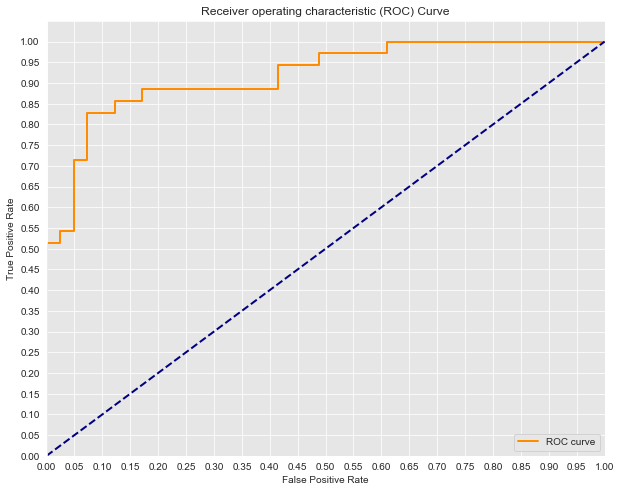

In [16]:
#Your code here

from sklearn.metrics import roc_curve, auc
import seaborn as sns
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Update your ROC curve to not only include a graph of the test set, but one of the train set

AUC: 0.9191637630662021


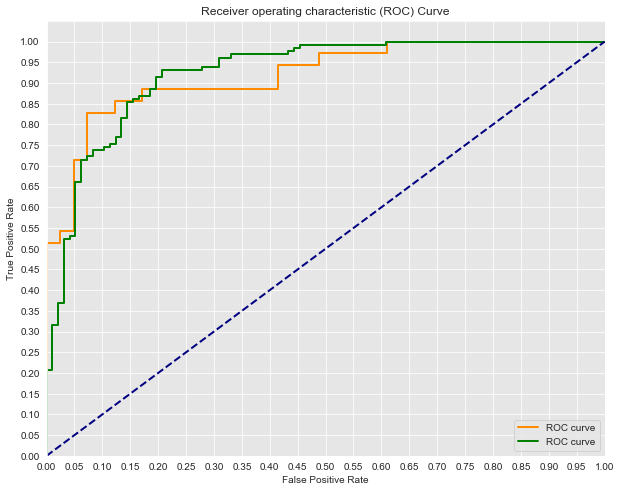

In [19]:
# Your code here
from sklearn.metrics import roc_curve, auc
import seaborn as sns
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
fpr, tpr, thresholds = roc_curve(y_train, y_hat_train)
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

Confusion matrix, without normalization
[[33  4]
 [ 8 31]]


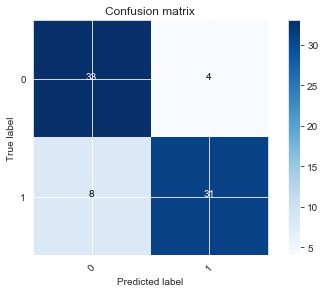

In [23]:
# Your code here
import numpy as np
import itertools

def binary_prediction(probabilities, threshold=.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes

test_predictions = binary_prediction(y_hat_test)




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])




## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [34]:
# Your code here
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)
logreg.fit(X, y)

y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Create an ROC Curve for the sci-kit learn model

AUC: 0.9191637630662021


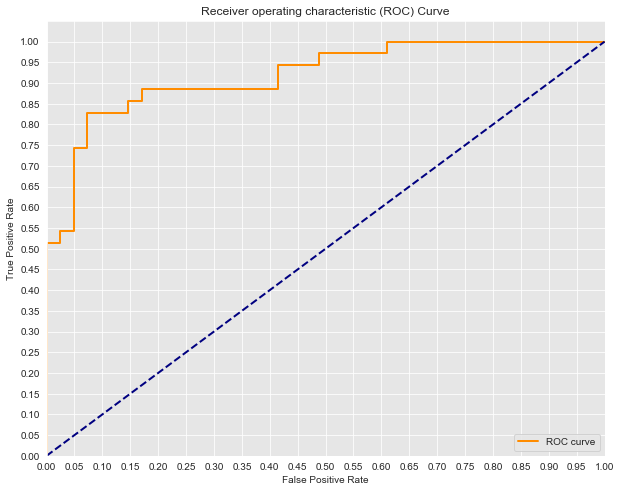

In [35]:
#Your code here
fpr, tpr, thresholds = roc_curve(y_test,y_test_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## As before add an ROC curve to the graph for the train set as well

AUC: 0.9191637630662021


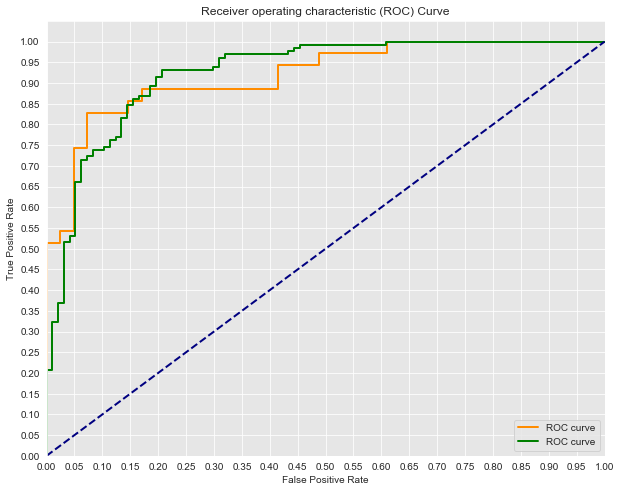

In [36]:
#Your code here

fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
fpr, tpr, thresholds = roc_curve(y_train, y_train_score)
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()






## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.9177700348432056


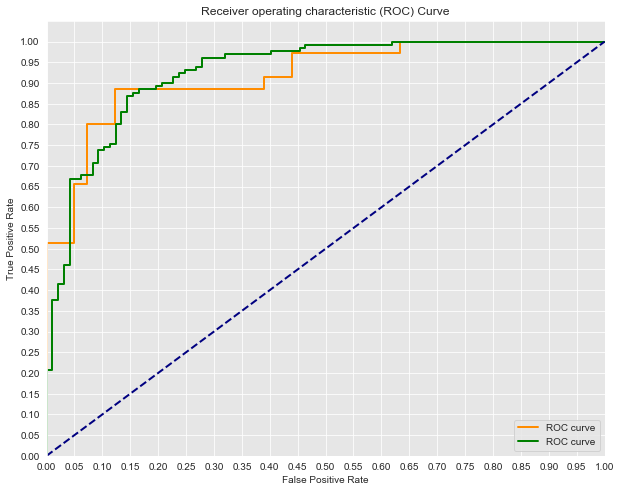

In [37]:
# Your code here

logreg = LogisticRegression(fit_intercept=True, C=1e16, random_state=2)
logreg.fit(X, y)

y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
fpr, tpr, thresholds = roc_curve(y_train, y_train_score)
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.9205574912891986


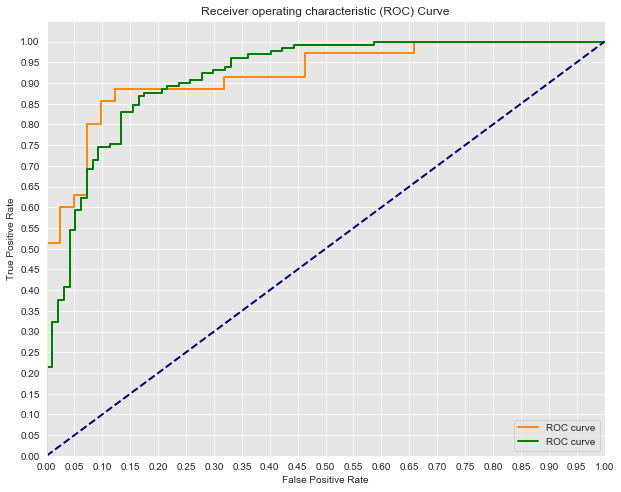

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.9226480836236933


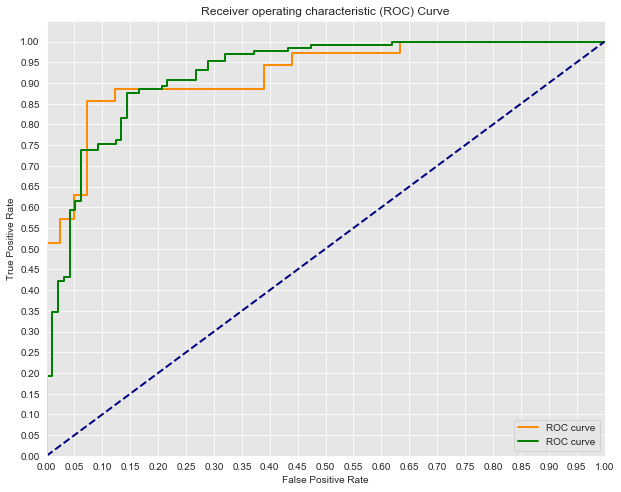

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.9219512195121952


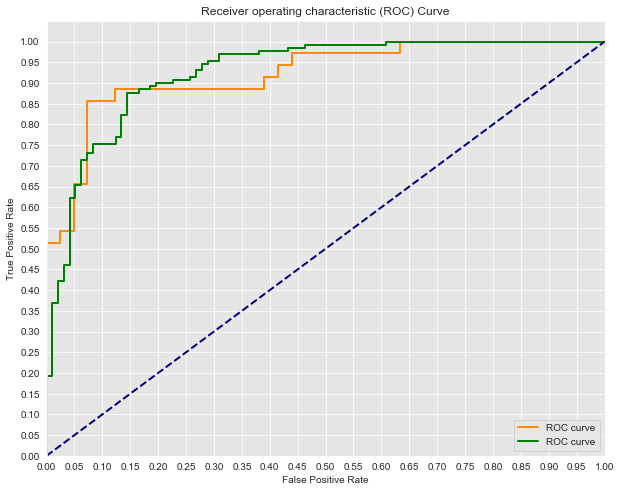

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.9219512195121952


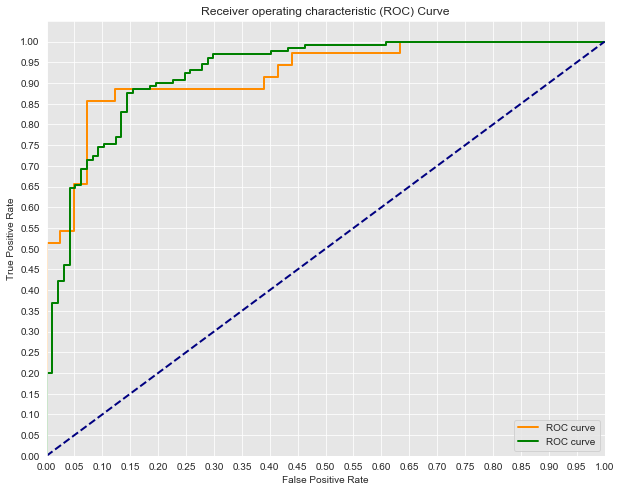

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.9205574912891986


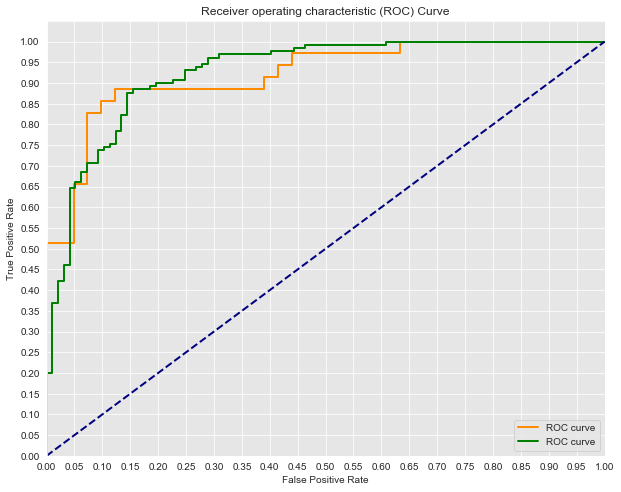

In [46]:
# Your code here
regpar=np.linspace(1,20,5)

for i in regpar:

        logreg = LogisticRegression(fit_intercept=True, C=i, random_state=2)
        logreg.fit(X, y)

        y_test_score = logreg.decision_function(X_test)
        y_train_score = logreg.decision_function(X_train)

        fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

        #Seaborns Beautiful Styling
        sns.set_style("darkgrid", {"axes.facecolor": ".9"})

        print('AUC: {}'.format(auc(fpr, tpr)))
        plt.figure(figsize=(10,8))
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve')
        fpr, tpr, thresholds = roc_curve(y_train, y_train_score)
        plt.plot(fpr, tpr, color='green',
                 lw=lw, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.yticks([i/20.0 for i in range(21)])
        plt.xticks([i/20.0 for i in range(21)])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()



## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here

it impacted a little bit. best accuracy was for C=1

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.